# [Statistics in Python](https://www.datacamp.com/completed/statement-of-accomplishment/course/0e9473c629958511c9c277c8235083e21eba94ae)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/data_science/statistics_in_python/notebook.ipynb)

**Contents**
  * [Summary Statistics](#Summary-Statistics)
  * [Probability](#Probability)
  * [Central Limit Theorem](#Central-Limit-Theorem)
  * [Correlation](#Correlation)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import binom, expon, norm, poisson, uniform

BASE_URL = "https://raw.githubusercontent.com/adamelliotfields/datacamp/main/notebooks/data_science/statistics_in_python/"

In [2]:
# 2018 food carbon footprint index
food_consumption = pd.read_csv(BASE_URL + "food_consumption.csv")
food_consumption.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [3]:
amir_deals = pd.read_csv(BASE_URL + "amir_deals.csv")
amir_deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [4]:
all_deals = pd.read_csv(BASE_URL + "all_deals.csv")
all_deals.head()

,product,num_users
0,3544,19
1,5073,43
2,6149,87
3,7863,83
4,14,17


In [5]:
world_happiness = pd.read_csv(BASE_URL + "world_happiness.csv")
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,grams_sugar_per_day
0,Finland,2,5,4.0,47,42400,81.8,155,86.8
1,Denmark,4,6,3.0,22,48300,81.0,154,152.0
2,Norway,3,3,8.0,11,66300,82.6,153,120.0
3,Iceland,1,7,45.0,3,47900,83.0,152,132.0
4,Netherlands,15,19,12.0,7,50500,81.8,151,122.0


## Summary Statistics

### Measures of Center

In [6]:
# filter for Belgium and USA
be_consumption = food_consumption[food_consumption.country == "Belgium"]
usa_consumption = food_consumption[food_consumption.country == "USA"]

# print mean and median consumption
print(be_consumption.consumption.mean())
print(be_consumption.consumption.median())
print(usa_consumption.consumption.mean())
print(usa_consumption.consumption.median())

42.13272727272727
12.59
44.650000000000006
14.58


In [7]:
# subset for belgium and usa
be_and_usa = food_consumption[
    (food_consumption.country == "Belgium") | (food_consumption.country == "USA")
]

# group by country and aggregate consumption mean and median
print(be_and_usa.groupby("country").consumption.agg(["mean", "median"]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [8]:
# subset for rice food category
rice_consumption = food_consumption[food_consumption.food_category == "rice"]

# print aggregate mean and median CO2 emissions for rice
print(rice_consumption.co2_emission.agg(["mean", "median"]))

mean      26.936161
median    11.525000
Name: co2_emission, dtype: float64


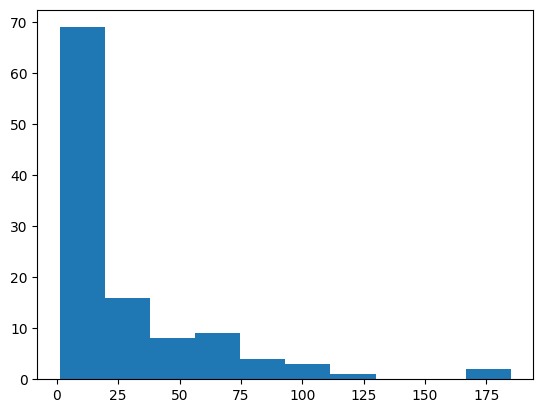

In [9]:
# plot histogram of CO2 emissions for rice
plt.hist(rice_consumption.co2_emission)
plt.show()

### Measures of Spread

In [10]:
# print quantiles of CO2 emission
print(np.quantile(food_consumption.co2_emission, [0, 0.25, 0.5, 0.75, 1]))
print(np.quantile(food_consumption.co2_emission, [0, 0.2, 0.4, 0.6, 0.8, 1]))
print(
    np.quantile(food_consumption.co2_emission, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
)

[   0.        6.1425   17.855    72.9275 1712.    ]
[   0.       4.274   12.068   28.058  115.816 1712.   ]
[0.00000e+00 6.97000e-01 4.27400e+00 7.68400e+00 1.20680e+01 1.78550e+01
 2.80580e+01 4.95240e+01 1.15816e+02 2.32115e+02 1.71200e+03]


In [11]:
# print variance and stddev of CO2 emissions for each food category
print(food_consumption.groupby("food_category").co2_emission.agg(["var", "std"]))

                        var         std
food_category                          
beef           85964.636005  293.197265
dairy          16097.977378  126.877805
eggs              19.391603    4.403590
fish            1018.610794   31.915683
lamb_goat      18334.348116  135.404387
nuts              38.560980    6.209749
pork            3180.103220   56.392404
poultry          225.651097   15.021688
rice            1158.404319   34.035339
soybeans           0.975777    0.987814
wheat             62.821538    7.926004


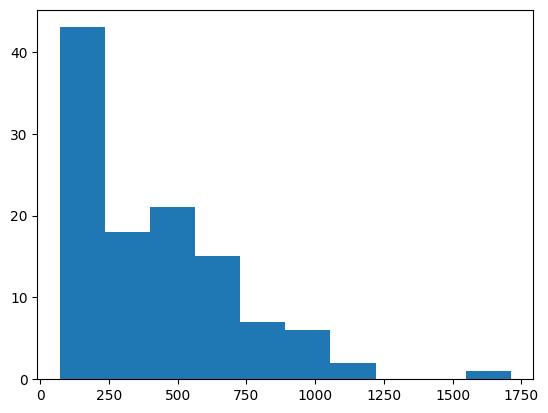

In [12]:
# create histogram of CO2 emissions for beef
plt.hist(food_consumption[food_consumption.food_category == "beef"].co2_emission)
plt.show()

In [13]:
# total emissions per country
emissions_by_country = food_consumption.groupby("country").co2_emission.sum()

# first, third, and IQR
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# lower and upper bounds
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# subset to find outliers and print
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## Probability

In [14]:
# count the deals for each product in `amir_deals`
counts = amir_deals["product"].value_counts()
probs = counts / counts.sum()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [15]:
# set random seed to a fixed number for reproducibility
np.random.seed(24)

# sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

# sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
127  Product B  Current    Won  2070.25          7
148  Product D  Current    Won  3485.48         52
77   Product B  Current    Won  6252.30         27
104  Product D  Current    Won  4110.98         39
166  Product C      New   Lost  3779.86         11
       product   client status   amount  num_users
133  Product D  Current    Won  5992.86         98
101  Product H  Current    Won  5116.34         63
110  Product B  Current    Won   696.88         44
49   Product B  Current    Won  3488.36         79
56   Product D  Current    Won  6820.84         42


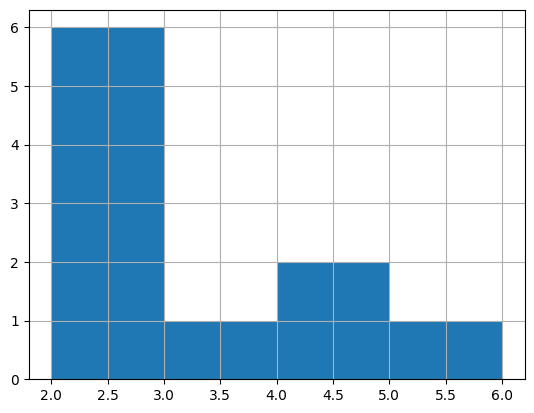

In [16]:
restaurant_groups = pd.DataFrame(
    {
        "group_id": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
        "group_size": [2, 4, 6, 2, 2, 2, 3, 2, 4, 2],
    }
)

# plot histogram
restaurant_groups["group_size"].hist(bins=[2, 3, 4, 5, 6])
plt.show()

### Probability Distribution

In [17]:
# create probability distribution
group_size = restaurant_groups["group_size"]
size_dist = group_size / group_size.sum()

# reset index of `size_dist`
size_dist = size_dist.reset_index()

# rename columns to `group_size` and `prob`
size_dist.columns = ["group_size", "prob"]

# calculate expected value
expected_value = (size_dist["group_size"] * size_dist["prob"]).sum()

# calculate probability of 4 or more and print
groups_4_or_more = size_dist[size_dist["group_size"] >= 4]
prob_4_or_more = groups_4_or_more["prob"].sum()
print(prob_4_or_more)

0.5172413793103448


### Uniform Distribution

In [18]:
# min and max wait times for backups that happen every 30 minutes
min_time = 0
max_time = 30

# calculate probability of waiting less than 5 minutes using `uniform.cdf`
# cdf = cumulative distribution function (probability of being less than or equal to a value)
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# more than 5 minutes
prob_greater_than_5 = 1 - prob_less_than_5
print(prob_greater_than_5)

# between 10 and 20 minutes
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


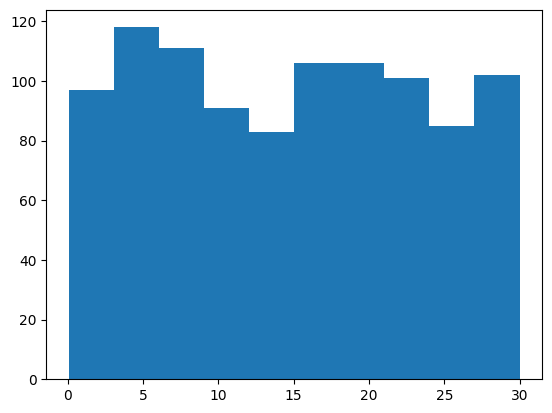

In [19]:
np.random.seed(334)

# simulate 1000 wait times and plot
# rvs = random variate sample (random values from a distribution)
wait_times = uniform.rvs(min_time, max_time, size=1000)
plt.hist(wait_times)
plt.show()

### Binomial Distribution

In [20]:
np.random.seed(10)

# simulate one year of 3 deals per week with a 30% average win rate
deals = binom.rvs(3, 0.3, size=52)
print(np.mean(deals))

0.8269230769230769


In [21]:
# probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
print(prob_3)

# probability of closing <= 1 deal out of 3
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
print(prob_less_than_or_equal_1)

# probability of closing > 1 deal out of 3
prob_greater_than_1 = 1 - prob_less_than_or_equal_1
print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


In [22]:
# expected wins with 30% win rate and 3 meetings per week
won_30pct = 3 * 0.3
print(won_30pct)

# 25%
won_25pct = 3 * 0.25
print(won_25pct)

# 35%
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


## Central Limit Theorem

### Normal Distribution

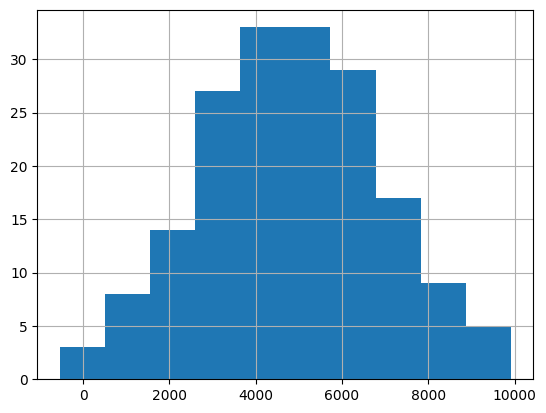

In [23]:
# histogram of `amount` using 10 bins
amir_deals["amount"].hist(bins=10)
plt.show()

In [24]:
# probability of a deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

# probability of a deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

# probability between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

# calculate amount 25% of deals will be under
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


### Sampling Distribution

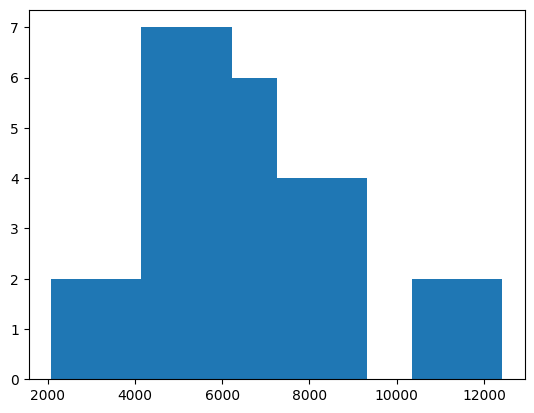

In [25]:
# calculate new mean
new_mean = 5000 * 1.2

# new standard deviation
new_sd = 2000 * 1.3

# simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# plot histogram
plt.hist(new_sales)
plt.show()

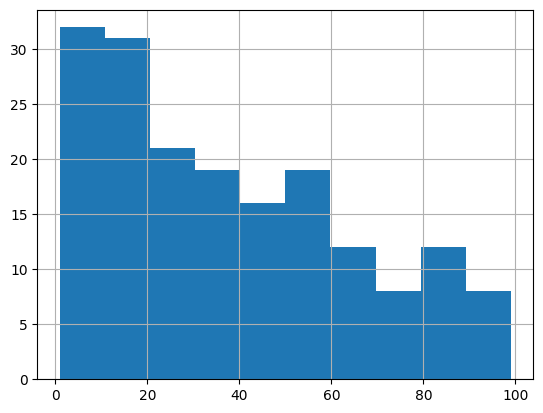

In [26]:
# plot histogram of `num_users`
amir_deals["num_users"].hist()
plt.show()

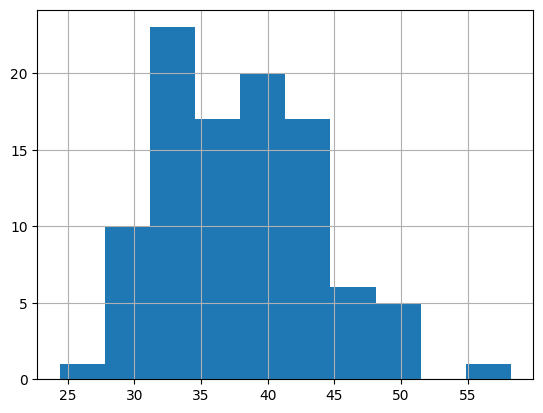

In [27]:
np.random.seed(104)

# sample 20 `num_users` with replacement
samp_20 = amir_deals["num_users"].sample(20, replace=True)

# repeat 100 times
sample_means = []
for i in range(100):
    # take a sample
    samp_20 = amir_deals["num_users"].sample(20, replace=True)
    # calculate the mean
    samp_20_mean = samp_20.mean()
    # append to `sample_means`
    sample_means.append(samp_20_mean)

# convert to Series and plot
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.show()

In [28]:
np.random.seed(321)

# get 30 means
sample_means = []
for i in range(30):
    cur_sample = all_deals["num_users"].sample(20, replace=True)
    cur_mean = cur_sample.mean()
    sample_means.append(cur_mean)

print(np.mean(sample_means))
print(amir_deals["num_users"].mean())

38.31333333333332
37.651685393258425


### Poisson Distribution

In [29]:
# probability Amir responds to 5 leads when his average is 4
prob_5 = poisson.pmf(5, 4)
print(prob_5)

# probability coworker responds to 5 when her average is 5.5
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

# 2 or fewer
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

# more than 10
prob_over_10 = 1 - poisson.cdf(10, 4)
print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


### Exponential Distribution

In [30]:
# probability Amir takes less than 1 hour to respond when he responds to 1 lead every 2.5 hours
prob_under_1 = expon.cdf(1, scale=2.5)
print(prob_under_1)

# longer than 4 hours
prob_over_4 = 1 - expon.cdf(4, scale=2.5)
print(prob_over_4)

# between 3 and 4 hours
prob_3_to_4 = expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5)
print(prob_3_to_4)

0.3296799539643607
0.20189651799465536
0.09929769391754684


## Correlation

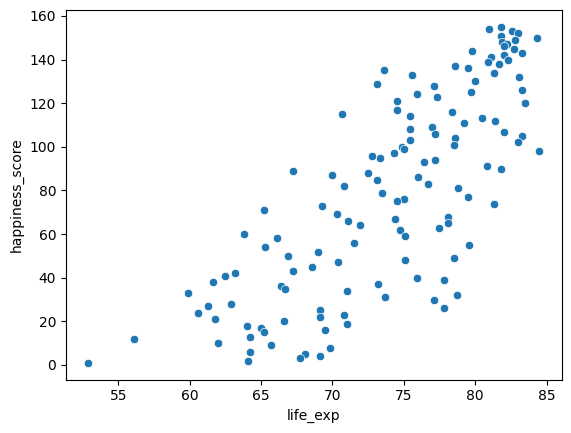

In [31]:
# scatterplot `happiness_score` vs `life_exp`
sns.scatterplot(x="life_exp", y="happiness_score", data=world_happiness)
plt.show()

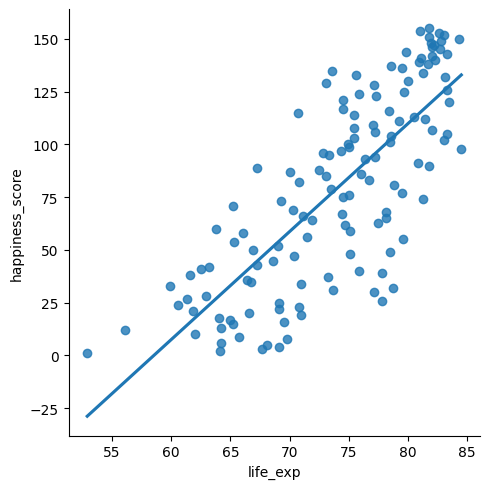

In [32]:
# scatterplot with trendline
sns.lmplot(x="life_exp", y="happiness_score", data=world_happiness, ci=None)
plt.show()

In [33]:
# calculate correlation coefficient
life_exp = world_happiness["life_exp"]
happiness_score = world_happiness["happiness_score"]
cor = life_exp.corr(happiness_score)
print(cor)

0.7737614613689974


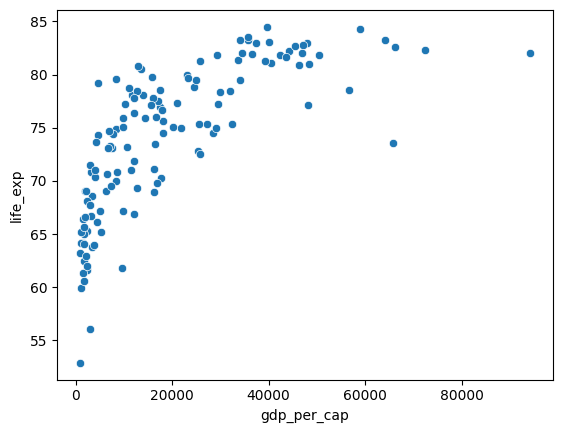

In [34]:
# scatterplot of `gdp_per_cap` and `life_exp`
sns.scatterplot(x="gdp_per_cap", y="life_exp", data=world_happiness)
plt.show()

In [35]:
# calculate correlation coefficient
gdp_per_cap = world_happiness["gdp_per_cap"]
life_exp = world_happiness["life_exp"]
cor = gdp_per_cap.corr(life_exp)
print(cor)

0.7235027287037938


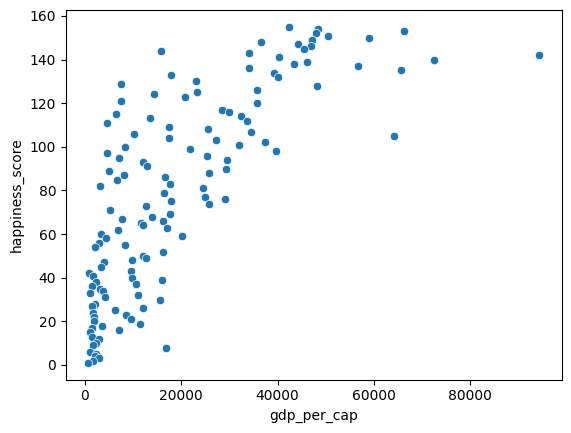

In [36]:
# scatterplot `happiness_score` and `gdp_per_cap`
sns.scatterplot(x="gdp_per_cap", y="happiness_score", data=world_happiness)
plt.show()

In [37]:
# calculate correlation coefficient
happiness_score = world_happiness["happiness_score"]
gdp_per_cap = world_happiness["gdp_per_cap"]
cor = happiness_score.corr(gdp_per_cap)
print(cor)

0.7601852769771024


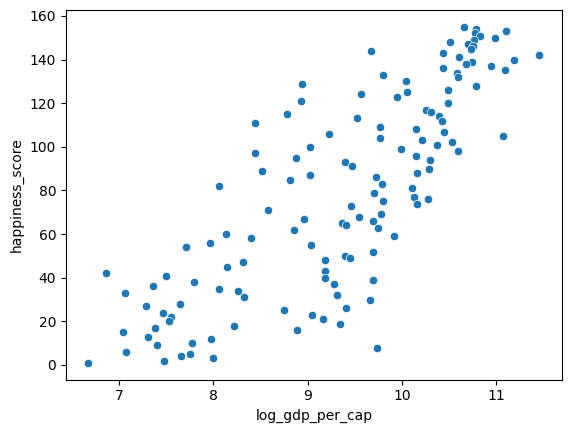

In [38]:
world_happiness["log_gdp_per_cap"] = np.log(world_happiness["gdp_per_cap"])

# scatterplot
sns.scatterplot(x="log_gdp_per_cap", y="happiness_score", data=world_happiness)
plt.show()

In [39]:
# calculate correlation coefficient
log_gdp_per_cap = world_happiness["log_gdp_per_cap"]
happiness_score = world_happiness["happiness_score"]
cor = log_gdp_per_cap.corr(happiness_score)
print(cor)

0.7965483583669718


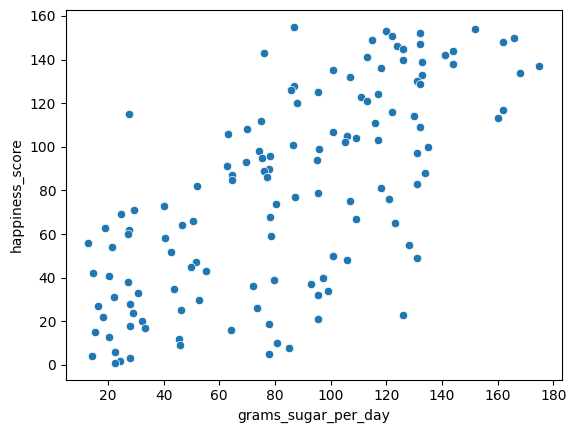

In [40]:
# scatterplot `grams_sugar_per_day` and `happiness_score`
sns.scatterplot(x="grams_sugar_per_day", y="happiness_score", data=world_happiness)
plt.show()

In [41]:
# calculate correlation coefficient
grams_sugar_per_day = world_happiness["grams_sugar_per_day"]
happiness_score = world_happiness["happiness_score"]
cor = grams_sugar_per_day.corr(happiness_score)
print(cor)

0.6939100021829633
